<a href="https://colab.research.google.com/github/Mfiso1/Fleet-Maintenance-Data/blob/main/vehicle_iot_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

url = "https://raw.githubusercontent.com/Mfiso1/Fleet-Maintenance-Data/main/logistics_dataset_with_maintenance_required.xlsx"

df = pd.read_excel(url)

df.head()



,Vehicle_ID,Make_and_Model,Year_of_Manufacture,Vehicle_Type,Usage_Hours,Route_Info,Load_Capacity,Actual_Load,Last_Maintenance_Date,Maintenance_Type,...,Brake_Condition,Failure_History,Anomalies_Detected,Predictive_Score,Maintenance_Required,Weather_Conditions,Road_Conditions,Delivery_Times,Downtime_Maintenance,Impact_on_Efficiency
0,1,Ford F-150,2022,Truck,530,Rural,7.534549,9.004247,2023-04-09,Oil Change,...,Good,1,0,0.171873,1,Clear,Highway,30.000000,0.093585,0.150063
1,2,Volvo FH,2015,Van,10679,Rural,7.671728,6.111785,2023-07-20,Tire Rotation,...,Fair,1,0,0.246670,1,Clear,Rural,30.000000,3.361201,0.343017
2,3,Chevy Silverado,2022,Van,4181,Rural,2.901159,3.006055,2023-03-17,Oil Change,...,Good,1,1,0.455236,1,Clear,Highway,48.627823,1.365300,0.100000
3,4,Chevy Silverado,2011,Truck,2974,Urban,15.893347,18.825290,2024-05-01,Tire Rotation,...,Good,0,1,0.060208,1,Clear,Highway,30.000000,0.000000,0.135749
4,5,Ford F-150,2014,Van,2539,Rural,60.668320,65.605463,2023-11-15,Tire Rotation,...,Good,1,1,0.264929,1,Rainy,Urban,300.000000,6.608704,0.395193


In [5]:
schema = pd.DataFrame({
    "column": df.columns,
    "dtype": df.dtypes.astype(str)
})
schema


,column,dtype
Vehicle_ID,Vehicle_ID,int64
Make_and_Model,Make_and_Model,object
Year_of_Manufacture,Year_of_Manufacture,int64
Vehicle_Type,Vehicle_Type,object
Usage_Hours,Usage_Hours,int64
Route_Info,Route_Info,object
Load_Capacity,Load_Capacity,float64
Actual_Load,Actual_Load,float64
Last_Maintenance_Date,Last_Maintenance_Date,datetime64[ns]
Maintenance_Type,Maintenance_Type,object


In [6]:
import pandas as pd

# Full schema
schema = pd.DataFrame({
    "column": df.columns,
    "dtype": df.dtypes.astype(str)
})

# Operational Metrics
operational_vars = [
    "Usage_Hours",
    "Load_Capacity",
    "Actual_Load",
    "Fuel_Consumption",
    "Engine_Temperature",
    "Vibration_Levels",
    "Oil_Quality",
    "Tire_Pressure",
    "Battery_Status"
]

# Filter schema for these metrics
operational_schema = schema[schema["column"].isin(operational_vars)]
operational_schema


,column,dtype
Usage_Hours,Usage_Hours,int64
Load_Capacity,Load_Capacity,float64
Actual_Load,Actual_Load,float64
Engine_Temperature,Engine_Temperature,int64
Tire_Pressure,Tire_Pressure,float64
Fuel_Consumption,Fuel_Consumption,float64
Battery_Status,Battery_Status,float64
Vibration_Levels,Vibration_Levels,float64
Oil_Quality,Oil_Quality,float64


In [7]:
operational_vars = [
    "Usage_Hours",
    "Load_Capacity",
    "Actual_Load",
    "Fuel_Consumption",
    "Engine_Temperature",
    "Vibration_Levels",
    "Oil_Quality",
    "Tire_Pressure",
    "Battery_Status"
]

operational_df = df[operational_vars]
operational_df.head()


,Usage_Hours,Load_Capacity,Actual_Load,Fuel_Consumption,Engine_Temperature,Vibration_Levels,Oil_Quality,Tire_Pressure,Battery_Status
0,530,7.534549,9.004247,5.000000,120,2.247033,80.393803,20.0,45.0
1,10679,7.671728,6.111785,5.000000,120,0.851417,91.302461,20.0,45.0
2,4181,2.901159,3.006055,13.006892,120,4.984557,70.109021,55.0,50.0
3,2974,15.893347,18.825290,5.000000,120,3.000329,74.932225,20.0,45.0
4,2539,60.668320,65.605463,5.000000,120,3.942115,86.357250,55.0,50.0


In [14]:
import matplotlib.pyplot as plt

# Operational metrics
metrics = [
    "Usage Hours", "Load Capacity", "Actual Load", "Fuel Consumption",
    "Engine Temperature", "Vibration Levels", "Oil Quality"
]

available = [col for col in metrics if col in df.columns]

# Generate histograms and boxplots
for col in available:
    # Histogram
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna())
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()

    # Boxplot
    plt.figure(figsize=(6,4))
    plt.boxplot(df[col].dropna())
    plt.title(f"Boxplot of {col}")
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()


In [11]:
usage_by_mm = df[["Make_and_Model", "Usage_Hours"]]
usage_by_mm.head()



,Make_and_Model,Usage_Hours
0,Ford F-150,530
1,Volvo FH,10679
2,Chevy Silverado,4181
3,Chevy Silverado,2974
4,Ford F-150,2539


<Figure size 1200x600 with 0 Axes>

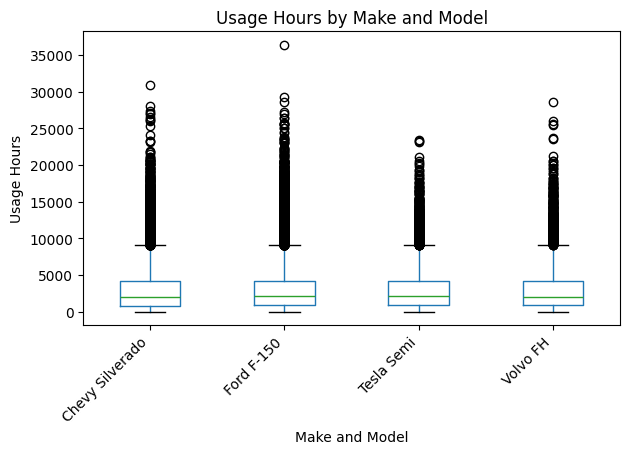

In [12]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
df.boxplot(column="Usage_Hours", by="Make_and_Model", grid=False)
plt.title("Usage Hours by Make and Model")
plt.suptitle("")  # removes auto pandas title
plt.xlabel("Make and Model")
plt.ylabel("Usage Hours")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()



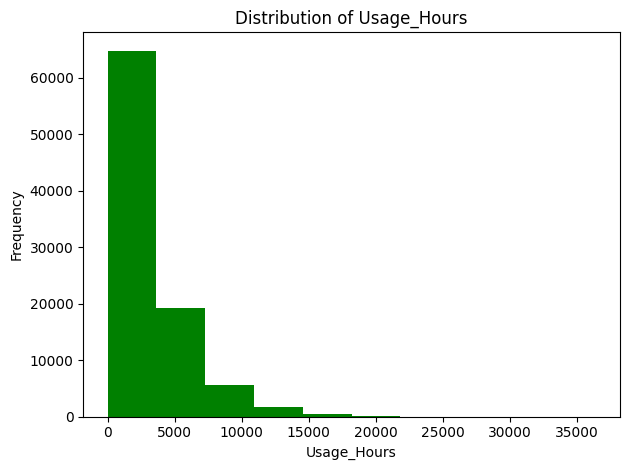

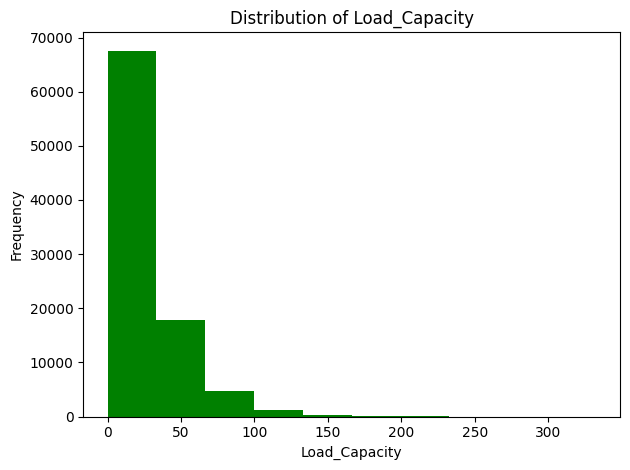

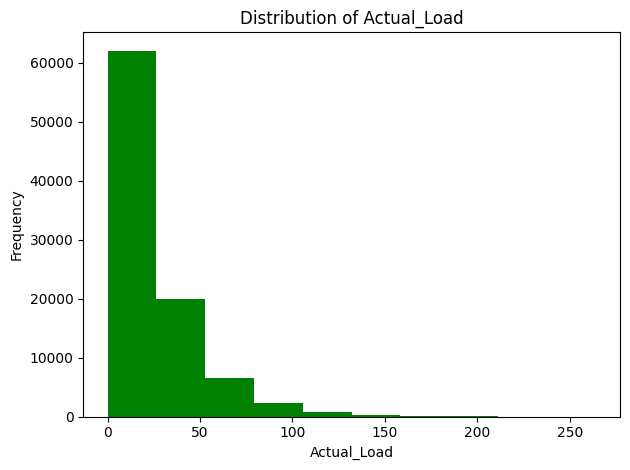

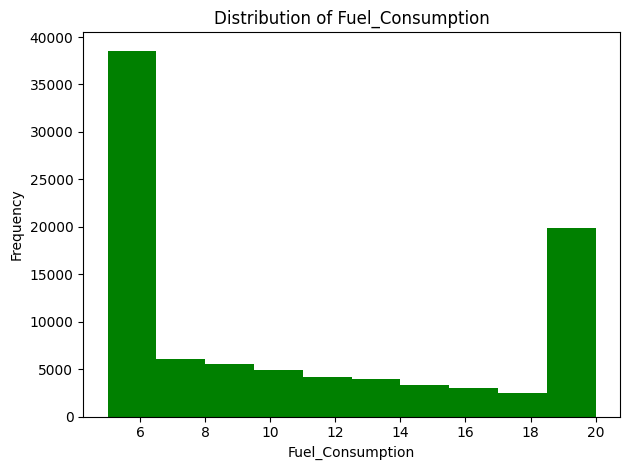

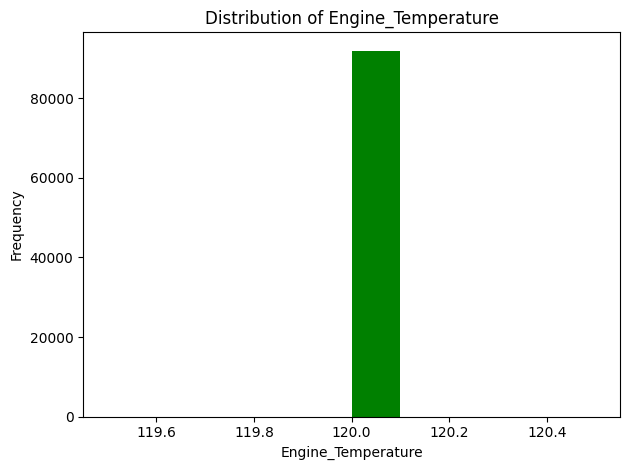

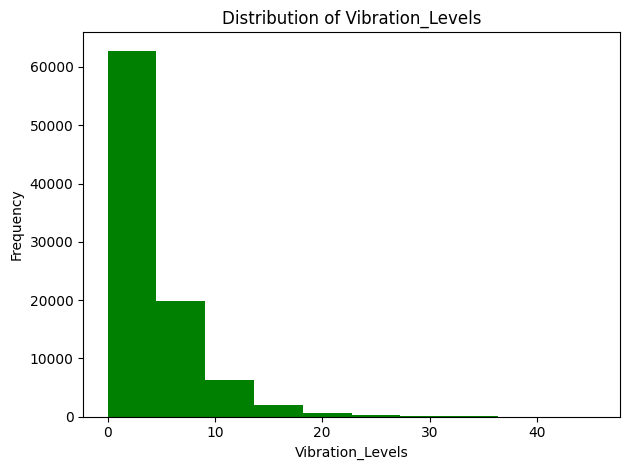

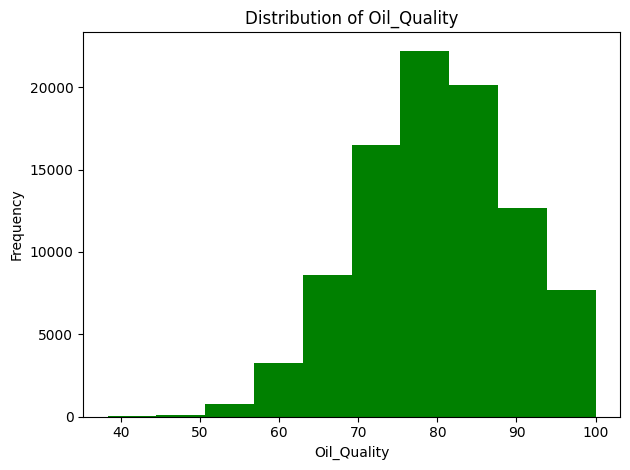

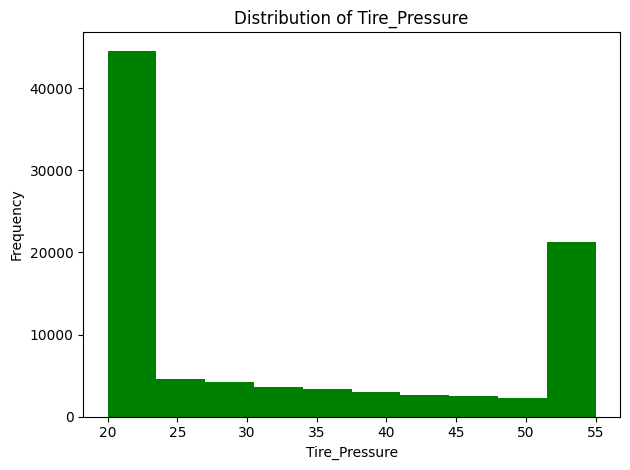

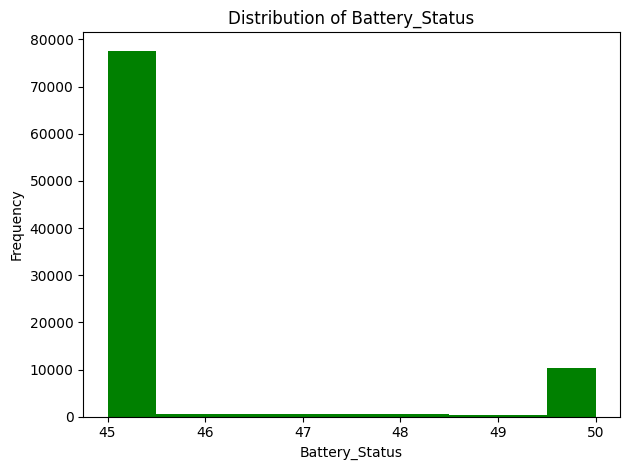

In [18]:
import matplotlib.pyplot as plt

for col in operational_df.columns:
    plt.figure()
    plt.hist(operational_df[col].dropna(), color="green")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.tight_layout()
    plt.show()


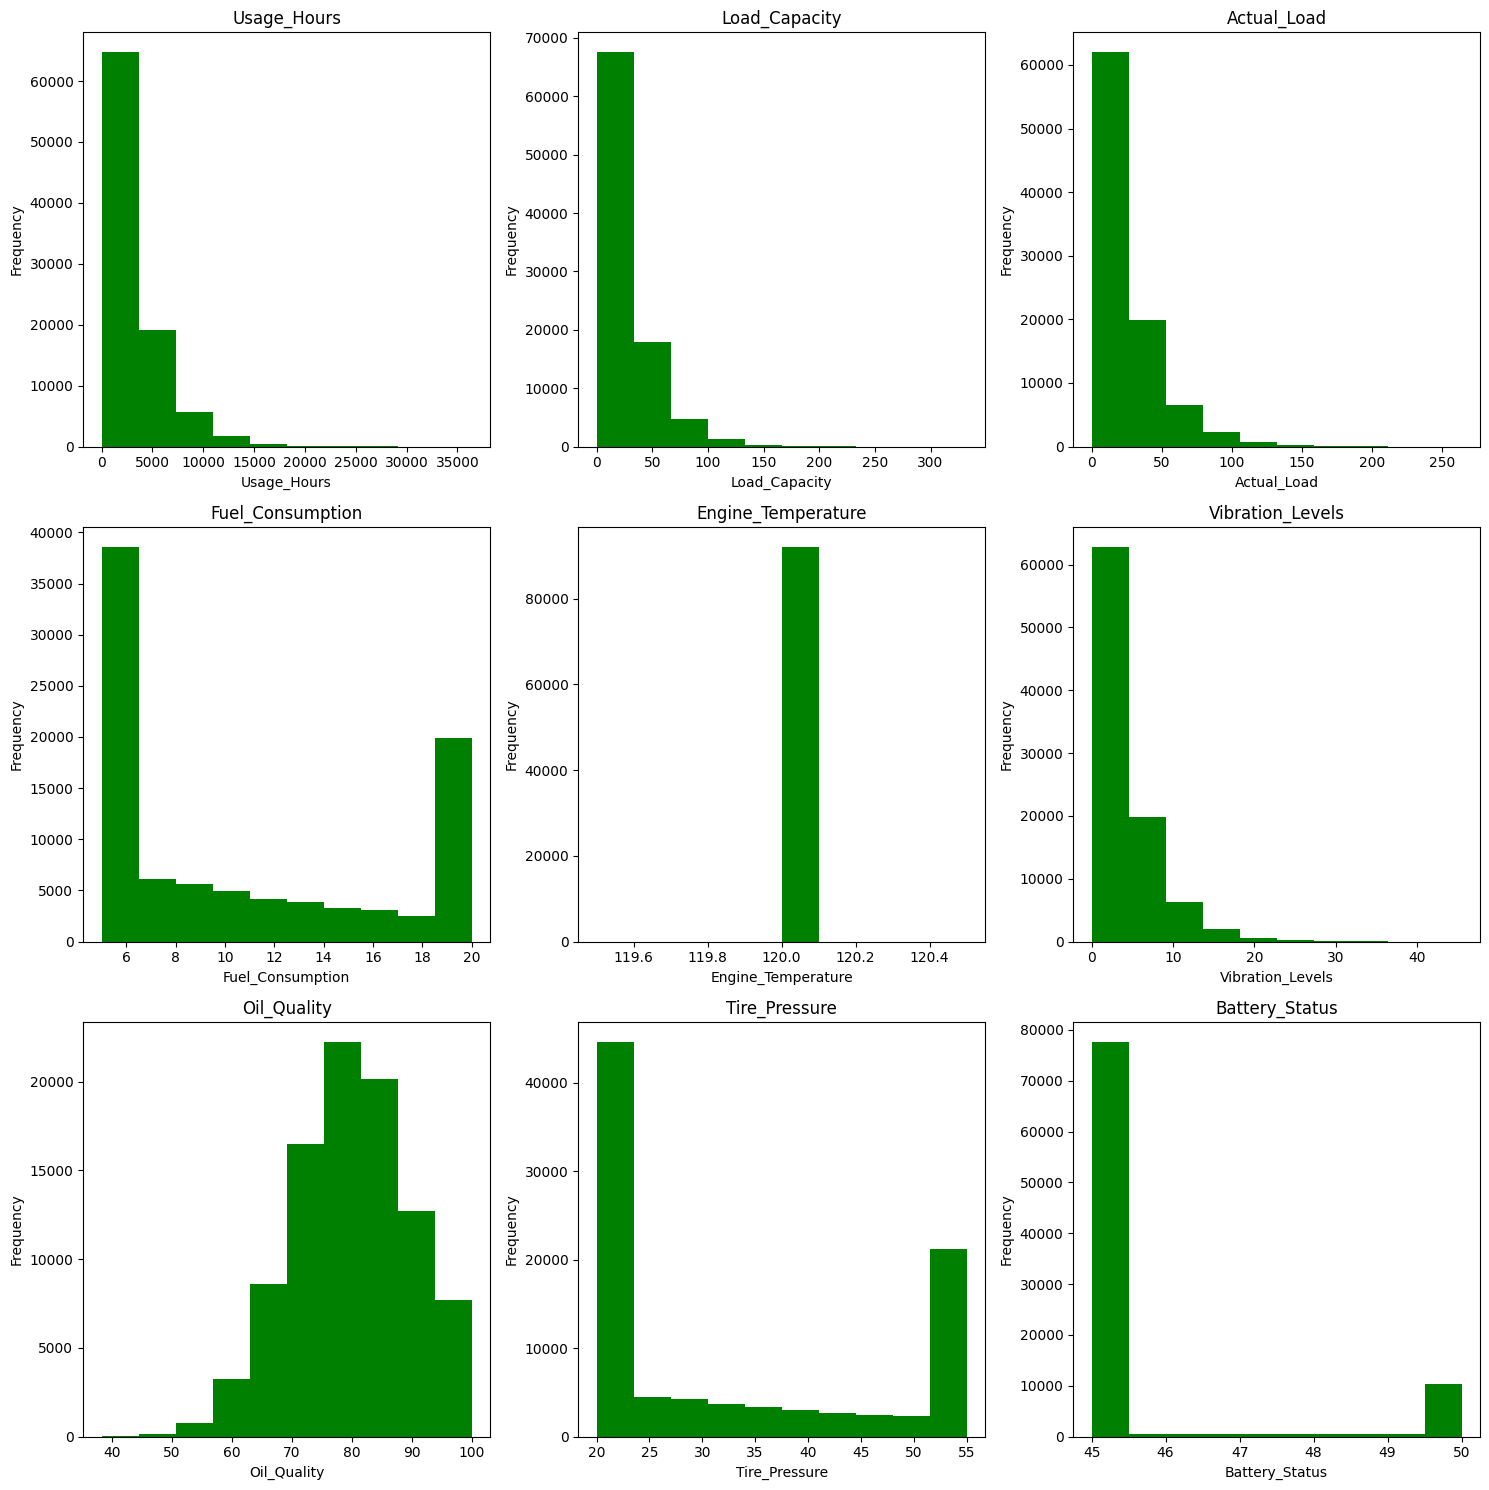

In [20]:
import matplotlib.pyplot as plt
import math

cols = operational_df.columns
n = len(cols)

# Choose grid layout
n_cols = 3
n_rows = math.ceil(n / n_cols)

plt.figure(figsize=(15, 5 * n_rows))

for i, col in enumerate(cols, 1):
    plt.subplot(n_rows, n_cols, i)
    plt.hist(operational_df[col].dropna(), color="green")
    plt.title(col)
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Available failure & maintenance columns: ['Failure_History', 'Maintenance_Required', 'Downtime_Maintenance', 'Maintenance_Cost']


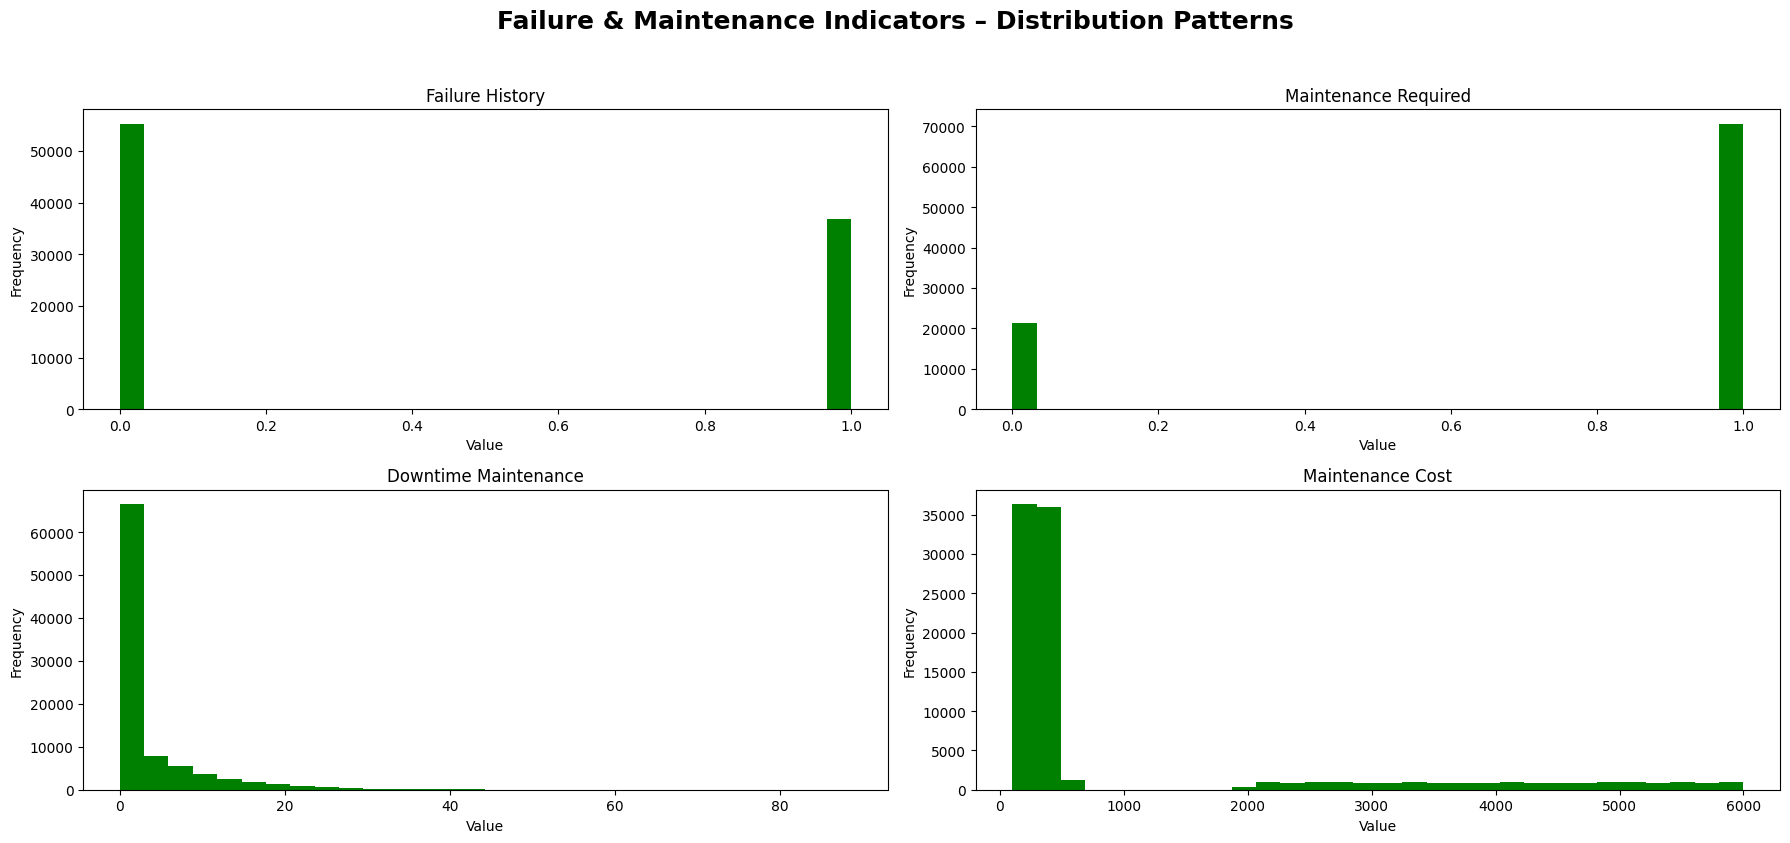

In [23]:
import matplotlib.pyplot as plt

# Expected failure & maintenance columns
expected_cols = [
    "Failure_History",
    "Detected_Anomalies",
    "Maintenance_Required",
    "Downtime_Maintenance",
    "Maintenance_Cost"
]

# Keep only columns that exist in the dataset
available_cols = [col for col in expected_cols if col in df.columns]

print("Available failure & maintenance columns:", available_cols)

# Plot
plt.figure(figsize=(18, 12))
plt.suptitle("Failure & Maintenance Indicators – Distribution Patterns", fontsize=18, weight='bold')

for i, col in enumerate(available_cols, 1):
    plt.subplot(3, 2, i)
    plt.hist(df[col].dropna(), bins=30, color="green")   # ← green
    plt.title(col.replace("_", " "), fontsize=12)
    plt.xlabel("Value")
    plt.ylabel("Frequency")

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [24]:
# List performance metric columns (adjust if needed to match your dataset)
performance_cols = [
    "Fuel_Consumption",
    "Engine_Temperature",
    "Tire_Pressure",
    "Vibration_Levels",
    "Battery_Status",
    "Oil_Quality"
]

# Create performance metrics dataframe
df_performance = df[performance_cols]
df_performance.head()


,Fuel_Consumption,Engine_Temperature,Tire_Pressure,Vibration_Levels,Battery_Status,Oil_Quality
0,5.000000,120,20.0,2.247033,45.0,80.393803
1,5.000000,120,20.0,0.851417,45.0,91.302461
2,13.006892,120,55.0,4.984557,50.0,70.109021
3,5.000000,120,20.0,3.000329,45.0,74.932225
4,5.000000,120,55.0,3.942115,50.0,86.357250


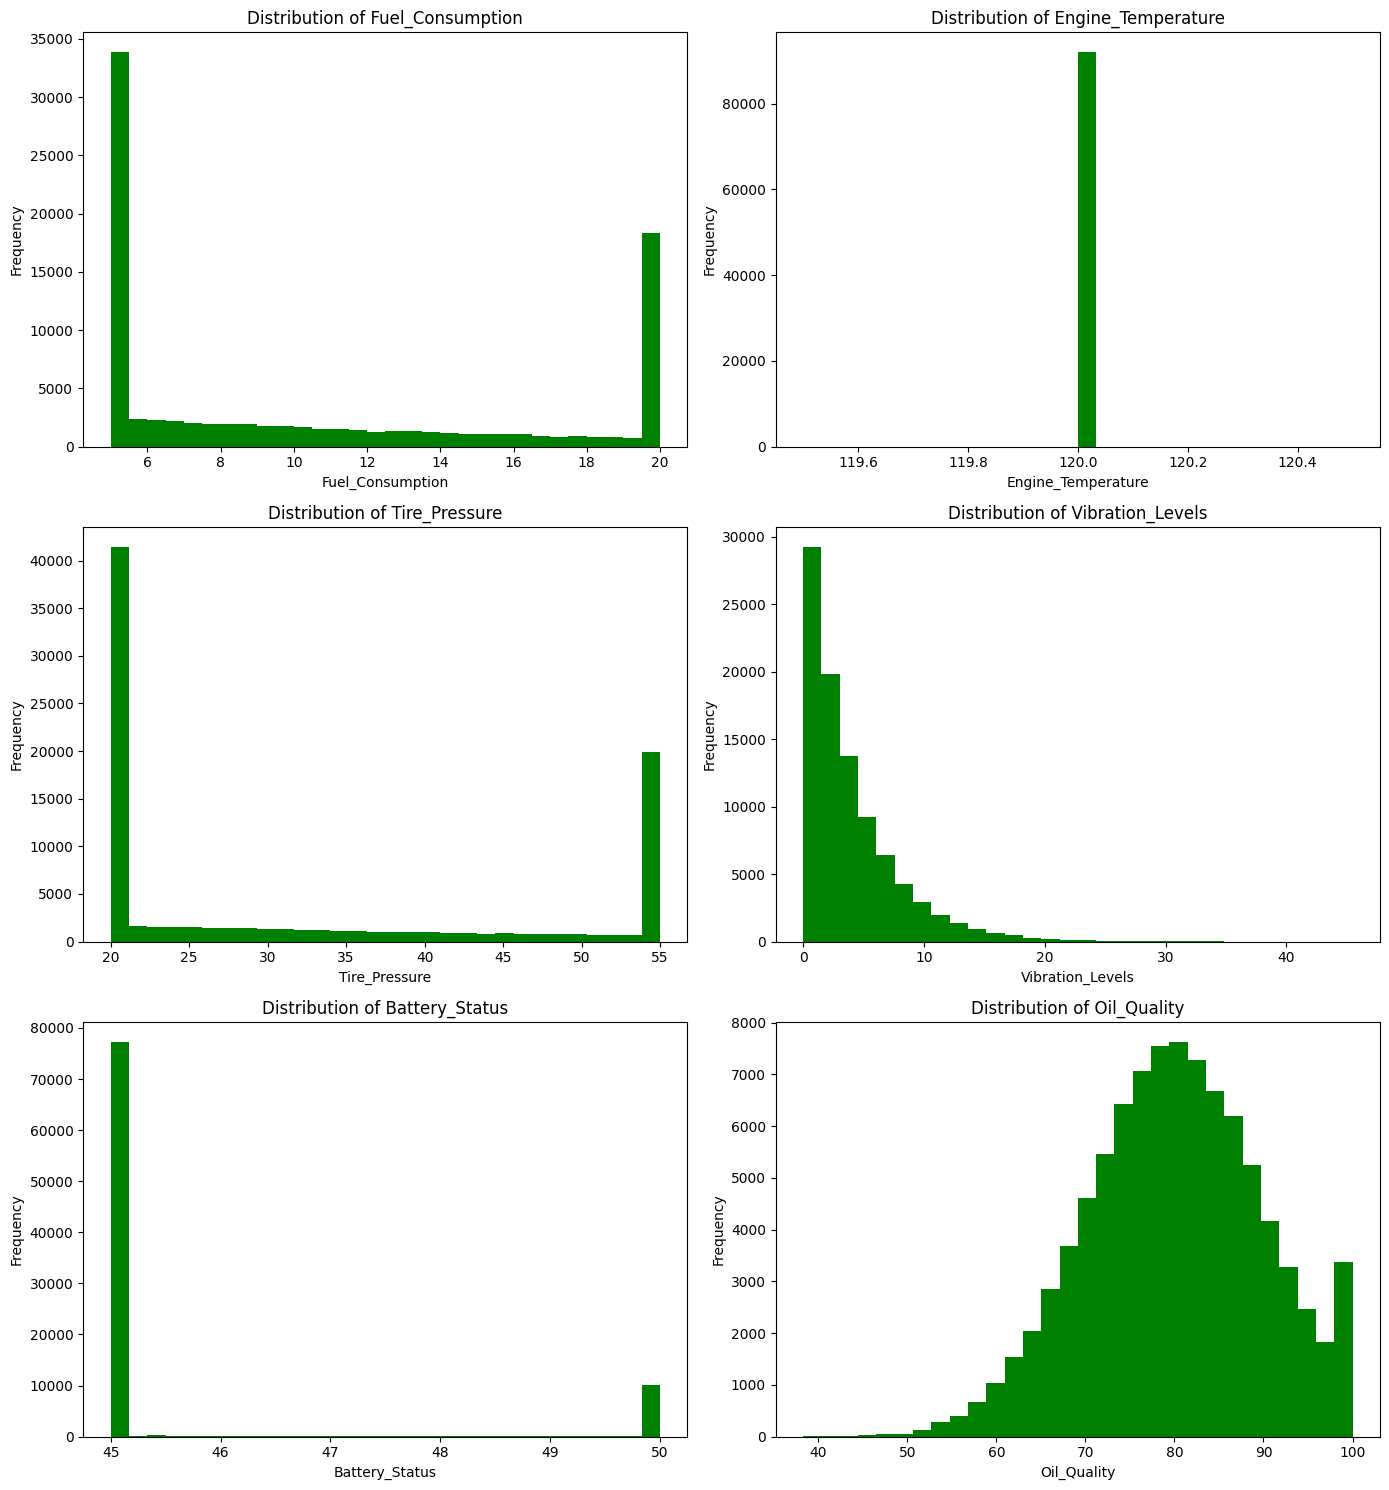

In [26]:
import matplotlib.pyplot as plt

# Number of performance metrics
n_cols = len(performance_cols)
rows = (n_cols + 1) // 2  # 2 plots per row

plt.figure(figsize=(14, 5 * rows))

for idx, col in enumerate(performance_cols, 1):
    plt.subplot(rows, 2, idx)
    plt.hist(df_performance[col].dropna(), bins=30, color="green")
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Detected operating context columns: {'road': 'Road_Conditions', 'weather': 'Weather_Conditions', 'delivery': 'Delivery_Times', 'route': 'Route_Info', 'vehicle_type': 'Vehicle_Type', 'make_model': 'Make_and_Model', 'year': 'Year_of_Manufacture'}

Basic summary for numeric context variables:
                       count         mean        std     min     25%  \
Delivery_Times       92000.0    99.283161  79.708201    30.0    30.0   
Year_of_Manufacture  92000.0  2016.968478   5.359597  2005.0  2013.0   

                             50%          75%     max  
Delivery_Times         69.617815   139.084008   300.0  
Year_of_Manufacture  2020.000000  2021.000000  2022.0  

Value counts for categorical context variables:

Road_Conditions:
Road_Conditions
Highway    36861
Rural      32294
Urban      22845
Name: count, dtype: int64

Weather_Conditions:
Weather_Conditions
Clear    73482
Rainy    13926
Snowy     2775
Windy     1817
Name: count, dtype: int64

Route_Info:
Route_Info
Highway    460

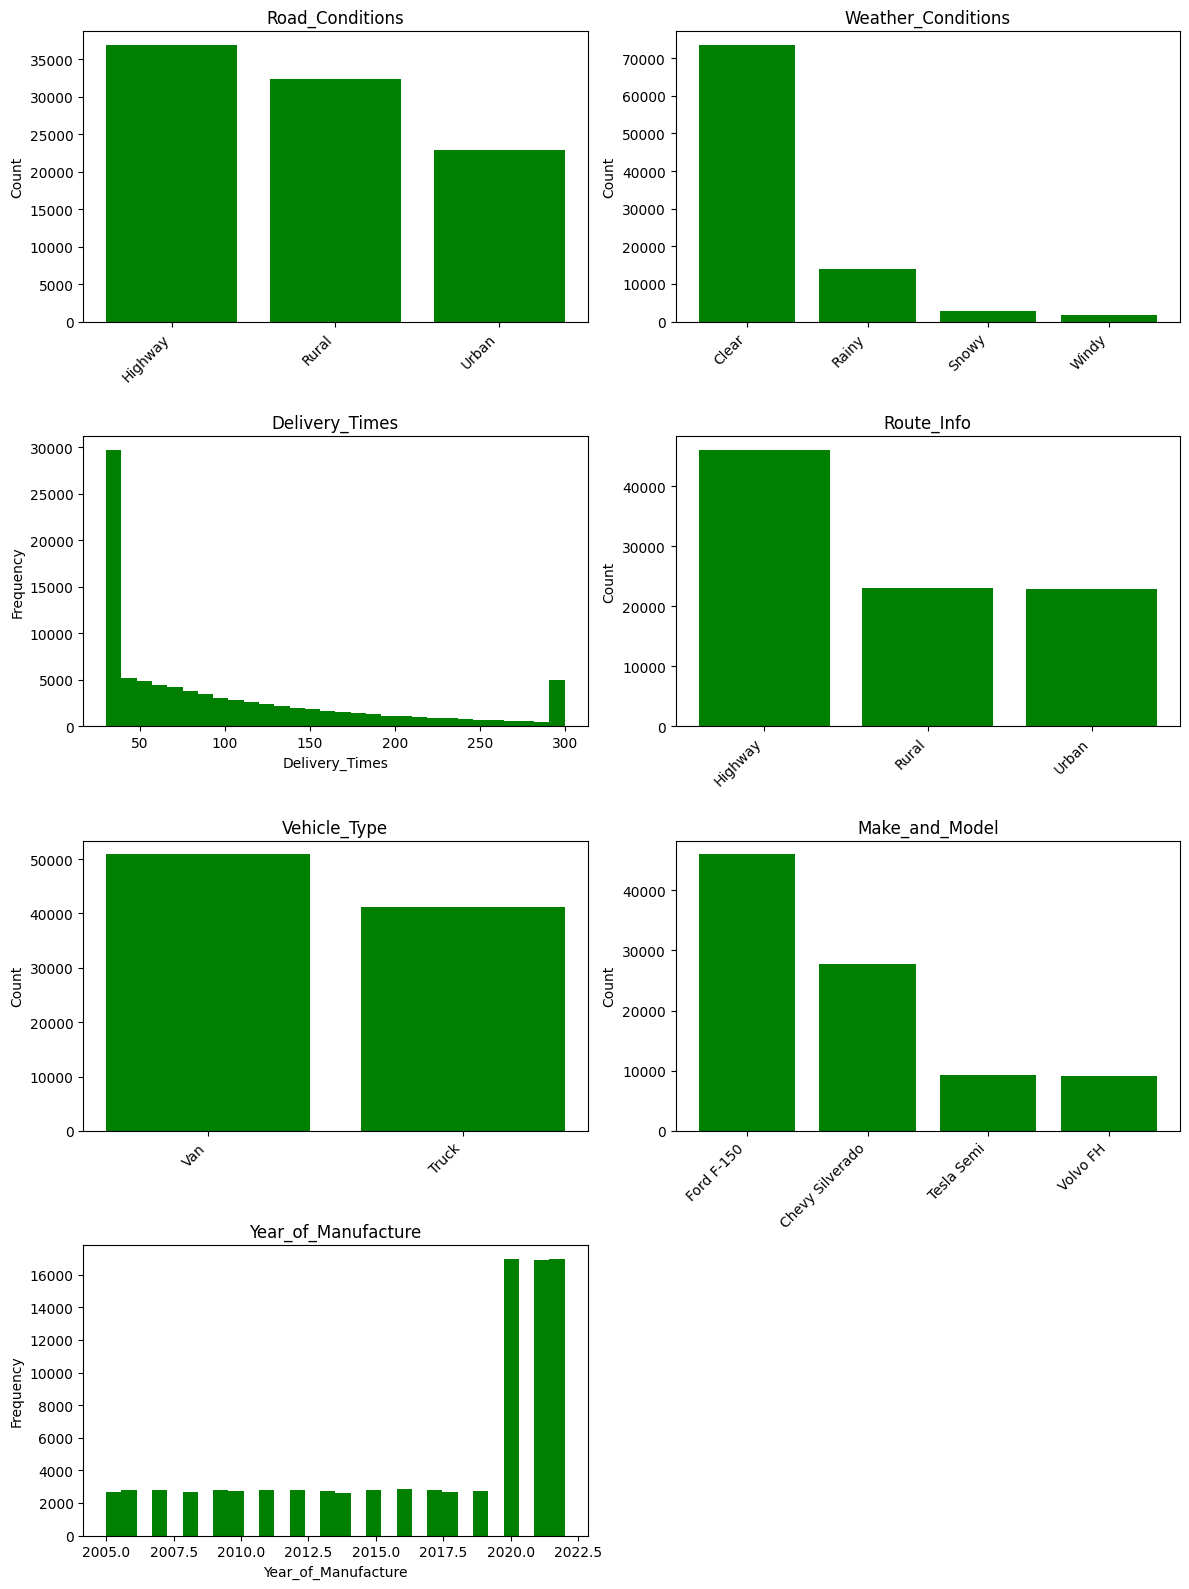

/tmp/ipython-input-2503404815.py:90: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  bp = plt.boxplot(


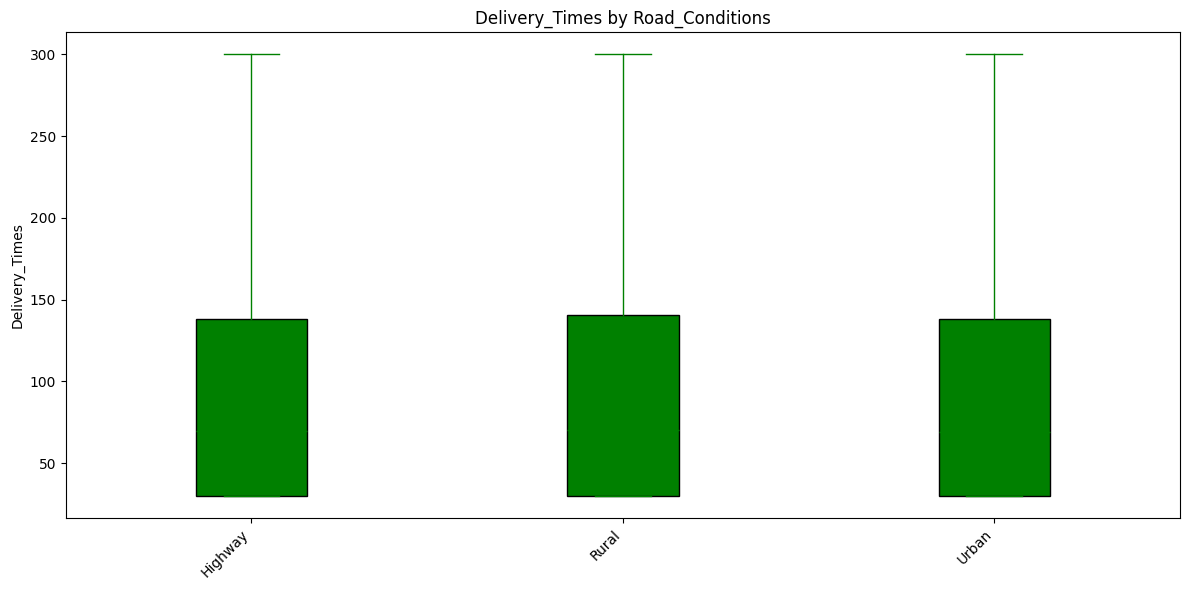


Saved operating context subset to operating_context_subset.csv


In [34]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Helper to find the first matching column from a list of candidates
def find_col(candidates, cols):
    for c in candidates:
        if c in cols:
            return c
    return None

# Candidate names for each operating context variable
candidates = {
    "road": ["Road_Conditions", "Road Conditions", "RoadConditions", "Road"],
    "weather": ["Weather_Conditions", "Weather Conditions", "WeatherConditions", "Weather"],
    "delivery": ["Delivery_Times", "Delivery Times", "DeliveryTimes", "Delivery"],
    "route": ["Route_Info", "Route Info", "RouteInfo", "Route"],
    "vehicle_type": ["Vehicle_Type", "Vehicle Type", "VehicleType", "Vehicle"],
    "make_model": ["Make_and_Model", "Make and Model", "MakeAndModel", "Make Model"],
    "year": ["Year_of_Manufacture", "Year of Manufacture", "YearOfManufacture", "Year"]
}

# Detect available columns
cols = list(df.columns)
detected = {k: find_col(v, cols) for k, v in candidates.items()}
available = {k: v for k, v in detected.items() if v is not None}

print("Detected operating context columns:", available)

# Build context dataframe
context_cols = list(available.values())
df_context = df[context_cols].copy()
df_context.head()

# Summaries
print("\nBasic summary for numeric context variables:")
numeric_cols = [c for c in context_cols if pd.api.types.is_numeric_dtype(df[c])]
if numeric_cols:
    print(df[numeric_cols].describe().T)

print("\nValue counts for categorical context variables:")
cat_cols = [c for c in context_cols if c not in numeric_cols]
for c in cat_cols:
    print(f"\n{c}:")
    print(df[c].value_counts().head(10))

# ------------------------------------------
# Visualization with GREEN color
# ------------------------------------------
n_plots = len(context_cols)
n_cols = 2
n_rows = int(np.ceil(n_plots / n_cols))
plt.figure(figsize=(12, 4 * n_rows))

for i, col in enumerate(context_cols, 1):
    plt.subplot(n_rows, n_cols, i)

    if col in cat_cols:
        vc = df[col].value_counts().sort_values(ascending=False)
        plt.bar(range(len(vc)), vc.values, color="green")
        plt.xticks(range(len(vc)), vc.index.astype(str), rotation=45, ha="right")
        plt.ylabel("Count")
        plt.title(col)

    else:
        plt.hist(df[col].dropna(), bins=30, color="green")
        plt.title(col)
        plt.xlabel(col)
        plt.ylabel("Frequency")

plt.tight_layout()
plt.show()

# ------------------------------------------
# Grouped boxplot (green) for delivery vs road or weather
# ------------------------------------------

if detected.get("delivery") and (detected.get("road") or detected.get("weather")):
    group_col = detected.get("road") or detected.get("weather")
    numeric = detected.get("delivery")

    unique_groups = df[group_col].dropna().unique()

    if len(unique_groups) <= 12:
        plt.figure(figsize=(12, 6))

        # Pure matplotlib approach
        data_to_plot = [df[df[group_col] == g][numeric].dropna() for g in unique_groups]

        bp = plt.boxplot(
            data_to_plot,
            labels=unique_groups,
            patch_artist=True
        )

        # Color all boxes green
        for box in bp['boxes']:
            box.set(facecolor='green')

        # Also color whiskers, caps and medians green
        for element in ['whiskers', 'caps', 'medians']:
            for line in bp[element]:
                line.set(color='green')

        plt.xticks(rotation=45, ha="right")
        plt.ylabel(numeric)
        plt.title(f"{numeric} by {group_col}")
        plt.tight_layout()
        plt.show()
    else:
        print(f"Too many groups in {group_col} to plot grouped boxplot.")

# Save context subset
df_context.to_csv("operating_context_subset.csv", index=False)
print("\nSaved operating context subset to operating_context_subset.csv")
